In [1]:
from utils.analysis.tools import simDir, springPhaseDiagram
from pathlib import Path
from utils.file_operations import input_parse
from tqdm import tqdm
import multiprocessing as mp 
from pathlib import Path
from utils import plot
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import pandas as pd

root = Path("/nfs/arupclab001/davidgoh/CoupledEPCondensates/workspace/04_CoupledFlow/")

In [2]:
no_condensate = simDir("/nfs/arupclab001/davidgoh/CoupledEPCondensates/workspace/04_CoupledFlow/20240118_RNAOnly/M1_1.0_b_-0.25_g_-0.1_c_0.0_k_0.05_kp_0.1_c1_3.53_sw_1.0_sr_2.5_cn_5.5_l_6_M3_1.0_kt_0.0_rl_9.0_wd_0.0")
no_condensate.run()
no_condensate.rna()
no_condensate_rna = no_condensate.rna_amount[-1][0]

Using default movie parameters.


In [ ]:
spd = springPhaseDiagram(root/"20240218_PDFAMSurfaceTension")
spd.extract_data(120)

In [ ]:
# spd2 = springPhaseDiagram(root/"20240218_PDAMSurfaceTension",sweep_file="sweep_parameters_2.txt")
# spd2.extract_data(120)

In [11]:
df1 = pd.read_pickle("/nfs/arupclab001/davidgoh/CoupledEPCondensates/workspace/04_Analysis/20240218_PDAMSurfaceTension1.pkl")
df2 = pd.read_pickle("/nfs/arupclab001/davidgoh/CoupledEPCondensates/workspace/04_Analysis/20240218_PDAMSurfaceTension2.pkl")
df = pd.concat([df1,df2])

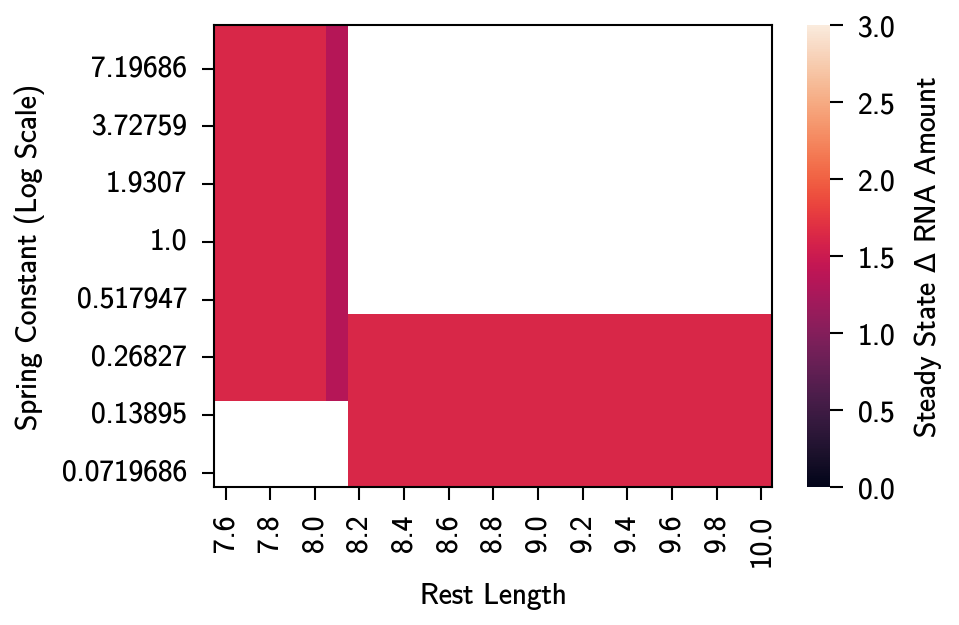

In [14]:
variable="rna_amount"
xlabel="Rest Length"
ylabel="Spring Constant (Log Scale)"
cbarlabel='Steady State $\Delta$ RNA Amount'

fig, ax = plt.subplots()
pivot = df.pivot_table(index="k_tilde",columns="rest_length",values=variable)
g = sns.heatmap(pivot-no_condensate_rna, ax = ax,
            cbar_kws={'label': cbarlabel},
            vmin=0,vmax=3)
ax.invert_yaxis()
ax.set_xlabel(xlabel)
ax.set_ylabel(ylabel)
for spine in ax.spines:
    ax.spines[spine].set_visible(True)